# Week 2 Notebook

#### Name: Mustafa Fakhra

#### Email: mostafafakhra@hotmail.com

#### Country: UAE, Dubai

## Libraries Importing

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb
import datetime

## Datasets Importing

In [69]:
city = pd.read_csv(r"C:\Users\mosta\Desktop\City.csv")
cabdata = pd.read_csv(r"C:\Users\mosta\Desktop\Cab_Data.csv")
customers = pd.read_csv(r"C:\Users\mosta\Desktop\Customer_ID.csv")
transactions = pd.read_csv(r"C:\Users\mosta\Desktop\Transaction_ID.csv")

In [70]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [71]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [72]:
cabdata.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [73]:
cabdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [74]:
customers.head() 

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [75]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [76]:
transactions.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [77]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


## Data Conversion for cab_data

In [79]:
cabdata['Date of Travel'] = pd.to_datetime(cabdata['Date of Travel'],
                                                  unit = 'D',
                                                  origin = '1899-12-30')

In [81]:
print('cabdata')
print(cabdata.info(),cabdata.describe())

cabdata
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB
None        Transaction ID   KM Travelled  Price Charged   Cost of Trip
count    3.593920e+05  359392.000000  359392.000000  359392.000000
mean     1.022076e+07      22.567254     423.443311     286.190113
std      1.268058e+05      12.233526     274.378911     157.993661
min      1.000001e+07       1.900000      15.60000

## Merging the Datasets Together

In [83]:
  #merge cabdata & transactions by Transaction ID
data_merge = pd.merge(
    cabdata,
    transactions,
    left_on = 'Transaction ID',
    right_on = 'Transaction ID',
    validate = 'one_to_one'
  )

In [103]:
  #merge above merged data to customers & sort by Transaction ID & Customer ID
main_dataset = pd.merge(
  data_merge,
  customers,
  on = 'Customer ID',
  validate = 'many_to_one'
).sort_values(
  by = ['Date of Travel', 'Customer ID']
)

In [104]:
# pr(main_dataset).to_file('main_dataset_pr.html')
main_dataset.to_csv('main_dataset.csv')
main_dataset.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
10422,10000845,2016-01-02,Yellow Cab,NEW YORK NY,17.92,561.71,253.7472,9,Card,Male,32,21212
14242,10000961,2016-01-02,Yellow Cab,NEW YORK NY,19.04,634.46,253.6128,85,Card,Male,19,19765
13252,10000929,2016-01-02,Yellow Cab,NEW YORK NY,37.24,1065.31,536.2560,439,Cash,Male,22,5494
11247,10000869,2016-01-02,Yellow Cab,NEW YORK NY,3.06,104.70,36.7200,475,Cash,Male,36,9959
2025,10000145,2016-01-02,Pink Cab,NEW YORK NY,2.10,37.18,21.4200,502,Cash,Male,28,15285


## Adding Features

In [86]:
main_dataset_copy = main_dataset.copy() #create a copy for experimentation
price_per_km = main_dataset['Price Charged'] / main_dataset['KM Travelled']

main_dataset.insert(6, 
'Price per KM', main_dataset['Price Charged'] / main_dataset['KM Travelled'], 
True)
main_dataset.insert(8, 
'Cost per KM', main_dataset['Cost of Trip']/main_dataset['KM Travelled'], 
True)

main_dataset.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Price per KM,Cost of Trip,Cost per KM,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
10422,10000845,2016-01-02,Yellow Cab,NEW YORK NY,17.92,561.71,31.345424,253.7472,14.16,9,Card,Male,32,21212
14242,10000961,2016-01-02,Yellow Cab,NEW YORK NY,19.04,634.46,33.322479,253.6128,13.32,85,Card,Male,19,19765
13252,10000929,2016-01-02,Yellow Cab,NEW YORK NY,37.24,1065.31,28.606606,536.2560,14.40,439,Cash,Male,22,5494
11247,10000869,2016-01-02,Yellow Cab,NEW YORK NY,3.06,104.70,34.215686,36.7200,12.00,475,Cash,Male,36,9959
2025,10000145,2016-01-02,Pink Cab,NEW YORK NY,2.10,37.18,17.704762,21.4200,10.20,502,Cash,Male,28,15285


## Hypothesis 1: Yellow Cab has a larger market share than Pink Cab

<AxesSubplot:xlabel='Company', ylabel='count'>

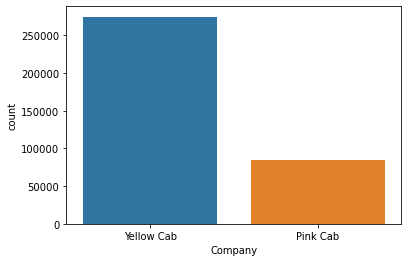

In [91]:
sb.countplot(x = main_dataset.Company)
#Results of Hypothesis 1:   True.

## Hypothesis 2: Both Cabs have similar distributed client base, based on a). age, b). gender, c). income & d). location

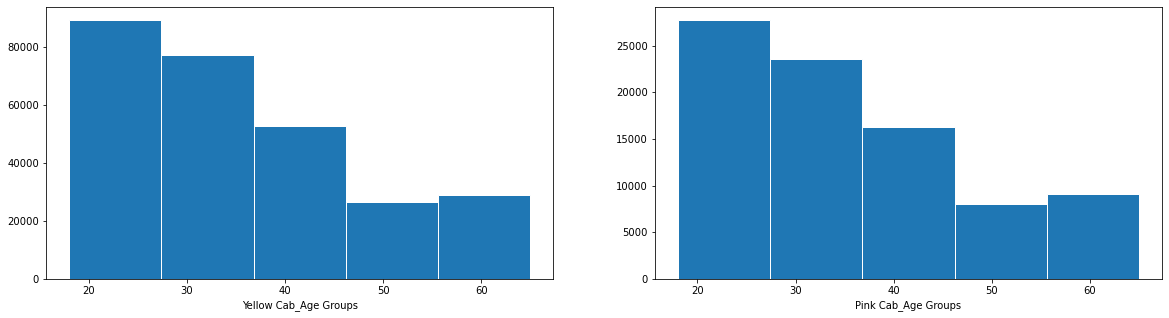

In [92]:

#a). Age
    #Define graph figure size
mp.subplots(figsize = (20, 5))

    #Plot for Yellow Cab Clients Count against Age. Bins = 5
mp.subplot(1,2,1)
mp.hist(main_dataset[main_dataset['Company'] == 'Yellow Cab']['Age'], bins = 5, edgecolor='white')
mp.xlabel('Yellow Cab_Age Groups')

    #Plot for Pink Cab Clients Count against Age. Bins = 5
mp.subplot(1,2,2)
mp.hist(main_dataset[main_dataset['Company'] == 'Pink Cab']['Age'], bins = 5, edgecolor='white')
mp.xlabel('Pink Cab_Age Groups')

mp.show()

#Results for Hypothesis 2a: True. Both Cabs have similarly distributed client base, based on Age

<AxesSubplot:xlabel='Company', ylabel='count'>

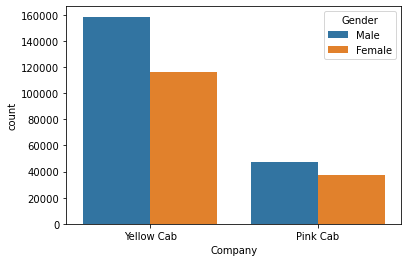

In [93]:
#b). Gender

sb.countplot(
    x = main_dataset.Company, 
    hue = main_dataset['Gender'],
    )


#Result for Hypothesis 2b: True. Both Cab Companies have similar ratios in Client gender distribution  

Text(0.5, 0, 'Pink Cab_Clients Income')

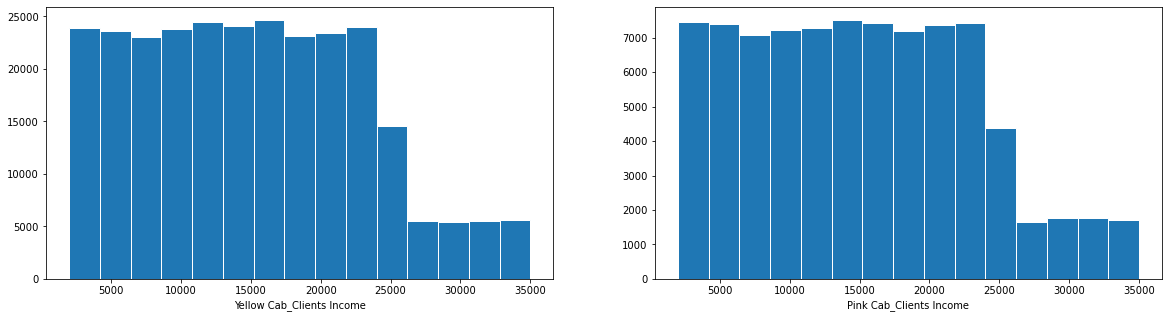

In [94]:
#c). Income

mp.subplots(figsize = (20,5))

mp.subplot(1,2,1)
mp.hist(main_dataset[main_dataset['Company'] == 'Yellow Cab']['Income (USD/Month)'], bins = 15, edgecolor = 'white')
mp.xlabel('Yellow Cab_Clients Income')


mp.subplot(1,2,2)
mp.hist(main_dataset[main_dataset['Company'] == 'Pink Cab']['Income (USD/Month)'], bins = 15, edgecolor = 'white')
mp.xlabel('Pink Cab_Clients Income')

#Results of Hypothesis 6: False. Both Cabs have a similarly distributed range of clinets based on Income

<AxesSubplot:ylabel='City'>

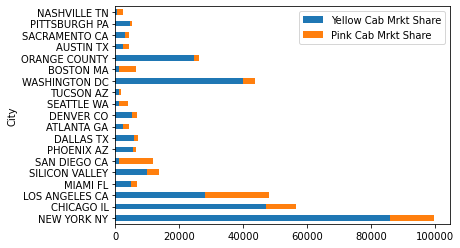

In [95]:
# d). Location



from collections import Counter
Counter(main_dataset.City).values()

#count duplicates

# fig, ax = mp.subplots()

# ax.bar(main_dataset['City'], Counter(main_dataset['City']).values(), label = "City")

    #Number of transactions per City for Yellow Cab
yellow_transactions_city = dict(Counter(main_dataset[main_dataset.Company == 'Yellow Cab'].City))
    #Number of transactions per City for Pink Cab
pink_transactions_city = dict(Counter(main_dataset[main_dataset.Company == 'Pink Cab'].City))


pd.DataFrame(
     {
    'City': list(Counter(main_dataset[main_dataset.Company == 'Pink Cab'].City).keys()),
    'Yellow Cab Mrkt Share': list(Counter(main_dataset[main_dataset.Company == 'Yellow Cab'].City).values()),
    'Pink Cab Mrkt Share': list(Counter(main_dataset[main_dataset.Company == 'Pink Cab'].City).values()),

}
).plot.barh(x = 'City', stacked = True)



#Reuslts for Hypothesis 2c:

## Hypothesis 3: Pink Cab charges higher per KM than Yellow Cab

## Hypothesis 4: Pink Cab has a higher Turnover per KM than Yellow Cab

In [96]:
# Create a merge of the describe() fn for Yellow & Pink Cabs on their Cost per KM & Price per KM
pd.merge(
    main_dataset[main_dataset['Company'] == 'Pink Cab'][['Cost per KM','Price per KM']].describe(),
    main_dataset[main_dataset['Company'] == 'Yellow Cab'][['Cost per KM', 'Price per KM']].describe(),
    right_index = True,
    left_index = True,
    suffixes = (' Pink',' Yellow')
)


#Results for Hypothesis 3: False. Pink Cab charges lower than Yellow Cab
#Results for Hypothesis 4: False. Pink Cab receives a lower Turnover per KM than Yellow Cab

,Cost per KM Pink,Price per KM Pink,Cost per KM Yellow,Price per KM Yellow
count,84711.000000,84711.000000,274681.000000,274681.000000
mean,10.998602,13.768510,13.200565,20.306073
std,0.606598,2.631528,0.726940,5.745021
min,10.000000,6.338621,12.000000,9.161765
25%,10.500000,11.937046,12.600000,15.805288
50%,11.000000,13.396096,13.200000,18.753655
75%,11.500000,15.232716,13.800000,24.100763
max,12.000000,39.046939,14.400000,53.955556


<AxesSubplot:ylabel='City'>

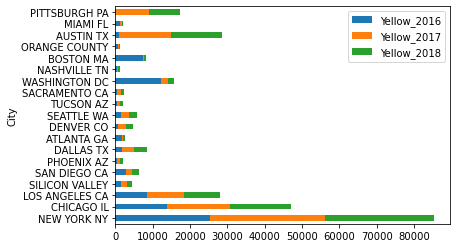

In [97]:
    #create DataFrame based on Yellow Cab's Annual Transactions (2016, 2017, 2018)
pd.DataFrame(
    {   
        'City':         list(Counter(main_dataset[
                                    (main_dataset['Company'].isin(['Yellow Cab'])) & 
                                    (main_dataset['Date of Travel'] < datetime.datetime(2017,12,31))].City
                                    )), 
        'Yellow_2016': list(Counter(main_dataset[
                                    (main_dataset['Company'].isin(['Yellow Cab'])) & 
                                    (main_dataset['Date of Travel'] < datetime.datetime(2016,12,31))].City
                                    ).values()),
        'Yellow_2017': list(Counter(main_dataset[
                                    (main_dataset['Company'].isin(['Yellow Cab'])) & 
                                    (main_dataset['Date of Travel'] > datetime.datetime(2016,12,31)) &
                                    (main_dataset['Date of Travel'] < datetime.datetime(2017,12,31))].City
                                    ).values()),
        'Yellow_2018': list(Counter(main_dataset[
                                    (main_dataset['Company'].isin(['Yellow Cab'])) & 
                                    (main_dataset['Date of Travel'] > datetime.datetime(2017,12,31)) &
                                    (main_dataset['Date of Travel'] < datetime.datetime(2018,12,31))].City
                                    ).values())
    }
).plot.barh(x = 'City', stacked = True) #plot stacked Bar graph

<AxesSubplot:ylabel='City'>

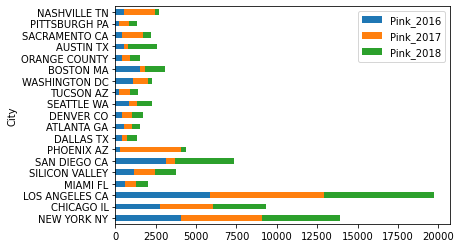

In [98]:
#create DataFrame based on Pink Cab's Annual Transactions (2016, 2017, 2018)
pd.DataFrame(
    {   
        'City':         list(Counter(main_dataset[
                                    (main_dataset['Company'].isin(['Pink Cab'])) & 
                                    (main_dataset['Date of Travel'] < datetime.datetime(2017,12,31))].City
                                    )), 
        'Pink_2016': list(Counter(main_dataset[
                                    (main_dataset['Company'].isin(['Pink Cab'])) & 
                                    (main_dataset['Date of Travel'] < datetime.datetime(2016,12,31))].City
                                    ).values()),
        'Pink_2017': list(Counter(main_dataset[
                                    (main_dataset['Company'].isin(['Pink Cab'])) & 
                                    (main_dataset['Date of Travel'] > datetime.datetime(2016,12,31)) &
                                    (main_dataset['Date of Travel'] < datetime.datetime(2017,12,31))].City
                                    ).values()),
        'Pink_2018': list(Counter(main_dataset[
                                    (main_dataset['Company'].isin(['Pink Cab'])) & 
                                    (main_dataset['Date of Travel'] > datetime.datetime(2017,12,31)) &
                                    (main_dataset['Date of Travel'] < datetime.datetime(2018,12,31))].City
                                    ).values())
    }
).plot.barh(x = 'City', stacked = True)

## Conclusion

Pink cab is still in transition of joining the market, evident by its smaller market share in comparison to Yellow Cab. This is also evident by its lower price per KM, to serve as an incentive for market disruption.

Regardless, based on the analysis, we recommend the best investment to be in Yellow Cab, which demonstrates longer experience in the market sector, with a loyal clientele, & greater margins per prospective transaction.